In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
patient_id = 260

In [2]:
data = pd.read_csv("/home/vault/empkins/tpD/D02/processed_data/SonyCam_processed_data/260/raw_variables/260_t2_20230925/facial/face_expressivity/260_t2_20230925_facemo.csv")

In [74]:
data_all_soft = data[['fac_hapintsoft', 'fac_sadintsoft', 'fac_surintsoft', 'fac_feaintsoft',
       'fac_angintsoft', 'fac_disintsoft', 'fac_conintsoft', 'neu_exp']]
data_all_hard = data[['fac_hapinthard', 'fac_sadinthard',
       'fac_surinthard', 'fac_feainthard', 'fac_anginthard', 'fac_disinthard','fac_coninthard']]

In [32]:
import imageio
import io
from PIL import Image
def show_frame(video_path, frame_number):
    video_reader = imageio.get_reader(video_path, 'ffmpeg')
    total_frames = len(video_reader)
    if frame_number < 0 or frame_number >= total_frames:
        print("Error: Invalid frame number.")
        return
    frame = video_reader.get_data(frame_number)
    video_reader.close()
    return Image.fromarray(frame)

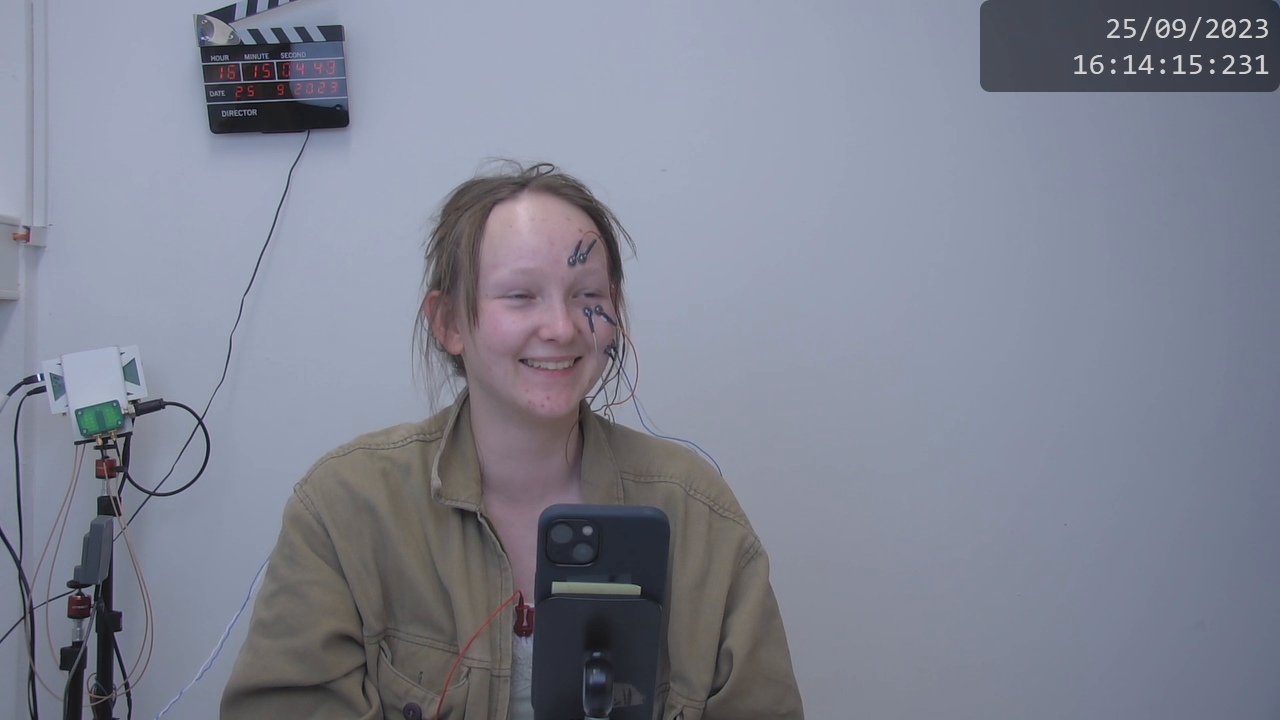

In [38]:
show_frame('/home/vault/empkins/tpD/D02/RCT/raw_data/260/260_t2_20230925.mp4', 2892)

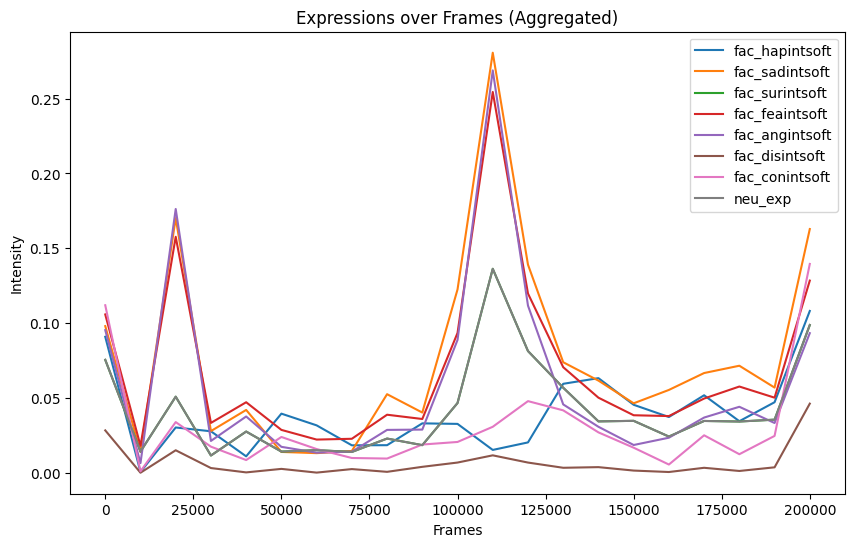

In [78]:
df = data_all_soft

frames_to_aggregate = 10000

df_aggregated = df.groupby(df.index // frames_to_aggregate).mean()

# Plotting
plt.figure(figsize=(10, 6))

for col in df_aggregated.columns:
    plt.plot(df_aggregated.index * frames_to_aggregate, df_aggregated[col], label=col)

plt.xlabel('Frames')
plt.ylabel('Intensity')
plt.title('Expressions over Frames (Aggregated)')
plt.legend()

plt.show()

In [86]:
data_der['fac_hapintsoft_mean']

0    0.0356
Name: fac_hapintsoft_mean, dtype: float64

In [85]:
data_der['fac_hapinthard_mean']

0    0.0191
Name: fac_hapinthard_mean, dtype: float64